# Multi-class multi-label stratified group k fold splitting

This notebook demonstrates how to create balanced k fold datasets in the case of multi-class multi-label problems where data are grouped. 

#### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedGroupKFold

#### Create data (for demonstration)

In [2]:
# Create an empty dataframe
df = pd.DataFrame()

In [3]:
# Create 3 output variables (targets) with 3, 5, and 6 classes respectively 
class_sizes = [3, 5, 6]
# Create 90k rows 30 groups
num_records = 90_000
num_groups = 30
# Create 3 input variables
input_cols = ["input_1", "input_2", "input_3"]

In [4]:
output_cols = []
new_output_cols = []
# Iteratively create each target
for i, cs in enumerate(class_sizes):
    output_cols.append(f"target_{i}")
    df[f"target_{i}"] = np.random.randint(1, cs+1, size=num_records)
    # Additionally, keep track of columns that would come to be if the target was one-hot encoded
    for j in range(cs):
        new_output_cols.append(f"target_{i}_{j}")

In [5]:
# Check the total number of columns that would come to be if all the targets were one-hot encoded
len(new_output_cols)

14

In [6]:
# Populate inputs (for demonstration, values do not matter)
df[input_cols] = np.random.rand(num_records, len(input_cols))

In [7]:
df

,target_0,target_1,target_2,input_1,input_2,input_3
0,1,3,4,0.184121,0.272129,0.643053
1,1,3,6,0.906493,0.612104,0.285136
2,3,5,2,0.276209,0.628607,0.254016
3,1,1,2,0.649963,0.815933,0.600408
4,1,4,2,0.836052,0.354230,0.698840
...,...,...,...,...,...,...
89995,1,4,1,0.713531,0.961268,0.477929
89996,2,2,4,0.216202,0.065231,0.263305
89997,1,5,6,0.428797,0.541125,0.969401
89998,1,1,5,0.136412,0.475731,0.788762


In [8]:
# Randomly assign group from 1 to num_groups
df["group"] = np.random.randint(1, num_groups+1, size=num_records)

In [9]:
df

,target_0,target_1,target_2,input_1,input_2,input_3,group
0,1,3,4,0.184121,0.272129,0.643053,27
1,1,3,6,0.906493,0.612104,0.285136,3
2,3,5,2,0.276209,0.628607,0.254016,1
3,1,1,2,0.649963,0.815933,0.600408,28
4,1,4,2,0.836052,0.354230,0.698840,9
...,...,...,...,...,...,...,...
89995,1,4,1,0.713531,0.961268,0.477929,8
89996,2,2,4,0.216202,0.065231,0.263305,15
89997,1,5,6,0.428797,0.541125,0.969401,9
89998,1,1,5,0.136412,0.475731,0.788762,14


#### Split dataset

Conduct multi-class multi-label stratified group k fold splitting

In [10]:
# One-hot encode targets
ohe = OneHotEncoder()
ohe.fit(df[output_cols])

OneHotEncoder()

In [11]:
# Include one-hot encoded targets and drop original targets
df[new_output_cols] = ohe.transform(df[output_cols]).toarray()
df = df.drop(columns=output_cols)

In [12]:
df

,input_1,input_2,input_3,group,target_0_0,target_0_1,target_0_2,target_1_0,target_1_1,target_1_2,target_1_3,target_1_4,target_2_0,target_2_1,target_2_2,target_2_3,target_2_4,target_2_5
0,0.184121,0.272129,0.643053,27,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.906493,0.612104,0.285136,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.276209,0.628607,0.254016,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.649963,0.815933,0.600408,28,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.836052,0.354230,0.698840,9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.713531,0.961268,0.477929,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89996,0.216202,0.065231,0.263305,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
89997,0.428797,0.541125,0.969401,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
89998,0.136412,0.475731,0.788762,14,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Each target either has 1 or 0. Label encode 0s and 1s across all targets.
# Eg. 
# We have:
# target0 target1 target2 target3
#       0       1       1       0
#       0       0       0       0
#       1       1       0       1
# We want:
# target0 target1 target2 target3
#       5       2       3       8
#       5       6       7       8
#       1       2       7       4
# Notice that all the 1s were label encoded first and then then 0s.

for i, col in enumerate(new_output_cols):
    df[col] = np.where(df[col]==1, i+1, i+len(new_output_cols))

In [14]:
df

,input_1,input_2,input_3,group,target_0_0,target_0_1,target_0_2,target_1_0,target_1_1,target_1_2,target_1_3,target_1_4,target_2_0,target_2_1,target_2_2,target_2_3,target_2_4,target_2_5
0,0.184121,0.272129,0.643053,27,1,15,16,17,18,6,20,21,22,23,24,12,26,27
1,0.906493,0.612104,0.285136,3,1,15,16,17,18,6,20,21,22,23,24,25,26,14
2,0.276209,0.628607,0.254016,1,14,15,3,17,18,19,20,8,22,10,24,25,26,27
3,0.649963,0.815933,0.600408,28,1,15,16,4,18,19,20,21,22,10,24,25,26,27
4,0.836052,0.354230,0.698840,9,1,15,16,17,18,19,7,21,22,10,24,25,26,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.713531,0.961268,0.477929,8,1,15,16,17,18,19,7,21,9,23,24,25,26,27
89996,0.216202,0.065231,0.263305,15,14,2,16,17,5,19,20,21,22,23,24,12,26,27
89997,0.428797,0.541125,0.969401,9,1,15,16,17,18,19,20,8,22,23,24,25,26,14
89998,0.136412,0.475731,0.788762,14,1,15,16,4,18,19,20,21,22,23,24,25,13,27


In [15]:
# Create a single target from all possible targets
df = df.melt(
    id_vars = input_cols + ["group"],
    var_name = "target_name",
    value_name = "class_label"
)

In [16]:
df

,input_1,input_2,input_3,group,target_name,class_label
0,0.184121,0.272129,0.643053,27,target_0_0,1
1,0.906493,0.612104,0.285136,3,target_0_0,1
2,0.276209,0.628607,0.254016,1,target_0_0,14
3,0.649963,0.815933,0.600408,28,target_0_0,1
4,0.836052,0.354230,0.698840,9,target_0_0,1
...,...,...,...,...,...,...
1259995,0.713531,0.961268,0.477929,8,target_2_5,27
1259996,0.216202,0.065231,0.263305,15,target_2_5,27
1259997,0.428797,0.541125,0.969401,9,target_2_5,14
1259998,0.136412,0.475731,0.788762,14,target_2_5,27


In [17]:
# Carry out stratified group k fold on the new target
sgkf = StratifiedGroupKFold(
    n_splits = 5, 
    random_state = 0, 
    shuffle = True
)
sgkf_split = sgkf.split(
    X = df[input_cols + ["group", "target_name"]],
    y = df["class_label"], 
    groups = df["group"]
)

In [18]:
# Create k folds
for fold, (train_idxs, test_idxs) in enumerate(sgkf_split):
    df.loc[test_idxs, "fold"] = fold

In [19]:
df

,input_1,input_2,input_3,group,target_name,class_label,fold
0,0.184121,0.272129,0.643053,27,target_0_0,1,0.0
1,0.906493,0.612104,0.285136,3,target_0_0,1,3.0
2,0.276209,0.628607,0.254016,1,target_0_0,14,0.0
3,0.649963,0.815933,0.600408,28,target_0_0,1,2.0
4,0.836052,0.354230,0.698840,9,target_0_0,1,3.0
...,...,...,...,...,...,...,...
1259995,0.713531,0.961268,0.477929,8,target_2_5,27,1.0
1259996,0.216202,0.065231,0.263305,15,target_2_5,27,1.0
1259997,0.428797,0.541125,0.969401,9,target_2_5,14,3.0
1259998,0.136412,0.475731,0.788762,14,target_2_5,27,2.0


In [20]:
# Count the number of examples in each of the k-folds
temp = (
    df
    .groupby(
        by=["fold", "class_label"]
    )
    .agg(
        target_count = pd.NamedAgg("class_label", "count")
    )
    .reset_index()
    .pivot_table(
        index="class_label",
        columns="fold",
        values="target_count"
    )
)

Text(0.5, 1.0, 'Heatmap of class distribution')

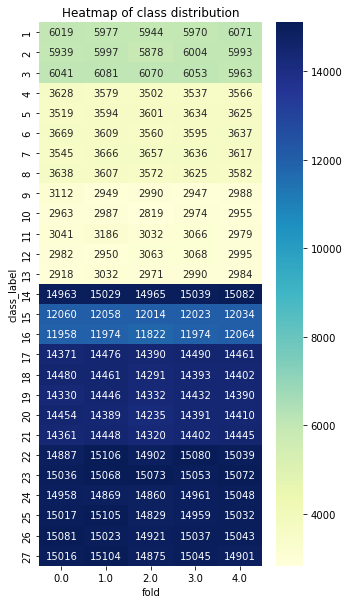

In [21]:
# Plot heatmap in order to visualize the number of examples in each fold
plt.figure(figsize = (5, 10))
sb.heatmap(
    temp,
    annot = True,
    cmap = "YlGnBu",
    fmt = "g"
)
plt.title("Heatmap of class distribution")

# Columns represent the fold and rows represent the group
# Entries in cell represent the number of examples
# The similar coloring acorss each row incicates that the strategy worked well

<AxesSubplot:xlabel='Fold', ylabel='Number of examples'>

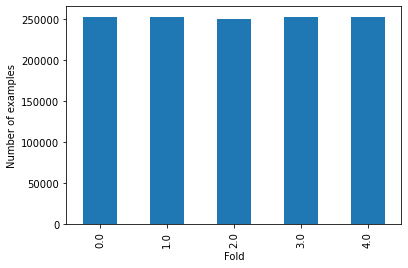

In [22]:
# Each fold has approximately the same number of examples
# It need not be so perfect in the real world
temp.sum(axis="rows").plot(kind="bar", xlabel="Fold", ylabel="Number of examples")

In [23]:
# If 80-20 train-test split is desired then rows marked with fold = 0 to 3 can be used for training 
# and fold = 4 can be used for testing.